### VI.A. Перцептрон и многослойный перцептрон (MLP).

**Перцептрон (Perceptron):

1.  **Входные данные (Inputs):** Перцептрон принимает на вход несколько числовых значений – признаки объекта, который мы хотим классифицировать.  Например, если мы хотим определить, является ли письмо спамом (0) или нет (1), признаками могут быть: количество определенных слов в письме, длина письма, наличие капслока и т.д.
2.  **Веса (Weights) и Смещение (Bias):**  Каждый вход умножается на свой вес (`w1`, `w2` и т.д.). Веса показывают, насколько важен каждый вход.  Кроме того, добавляется еще один специальный вес – **смещение (bias)**, который обозначается обычно как `b`.
3.  **Суммирование:**  Входы, умноженные на веса, и смещение суммируются.  Получается некая "взвешенная сумма": `z = w1*x1 + w2*x2 + b`
4.  **Функция активации (Activation function):**  Полученная сумма `z` пропускается через **функцию активации**.  Функция активации решает, "активируется" ли нейрон (перцептрон) или нет.  Для простого перцептрона часто используют **ступенчатую функцию активации** (step function):

    ```
    activation(z) = 1, если z >= 0
                   = 0, если z < 0
    ```

    Если взвешенная сумма `z` больше или равна нулю, перцептрон выдает `1` (например, "не спам"), иначе – `0` ("спам").

Перцептрон, по сути, проводит **прямую линию** (в 2D) или **гиперплоскость** (в многомерном пространстве), которая разделяет эти классы.

*   **Веса (`w1`, `w2`)** определяют наклон этой прямой.
*   **Смещение (`b`)** сдвигает прямую, чтобы лучше отделить классы.

Перцептрон реализует **линейную функцию**, за которой следует нелинейная ступенчатая функция.  Именно **линейная** часть (`w1*x1 + w2*x2 + b`) отвечает за разделяющую прямую.

**Многослойный перцептрон (MLP) – решение проблемы нелинейности!**

Чтобы решать более сложные, **нелинейные** задачи, мы можем объединить несколько перцептронов в **многослойную сеть**.  Это и есть **многослойный перцептрон (MLP)**, или, как его еще называют, **полносвязная нейронная сеть (Feedforward Neural Network)**.

**Как устроен MLP:**

1.  **Входной слой:**  Принимает входные данные (признаки).  Это как "первый ряд" перцептронов.
2.  **Скрытые слои (Hidden Layers):**  Один или несколько слоев перцептронов, расположенных между входным и выходным слоями.  Именно **скрытые слои** позволяют MLP изучать сложные, нелинейные зависимости в данных.  Каждый нейрон в скрытом слое получает вход от **всех** нейронов предыдущего слоя (отсюда и "полносвязная").
3.  **Выходной слой:**  Выдает результат работы сети.  Количество нейронов в выходном слое зависит от задачи (например, 1 нейрон для бинарной классификации, несколько нейронов для многоклассовой классификации).

**Визуализация MLP:**

```
Входной слой   Скрытый слой 1   Скрытый слой 2   Выходной слой
    O ---------> O ---------> O ---------> O
    O ---------> O ---------> O ---------> O
    O ---------> O ---------> O ---------> O
```

*   `O` – это нейрон (перцептрон).
*   Стрелки показывают связи между нейронами (каждый нейрон в следующем слое связан со всеми нейронами в предыдущем слое).

**Ключевая идея:**  Сочетание **множества перцептронов** и **скрытых слоев** позволяет MLP аппроксимировать (приближать) **любую сколь угодно сложную функцию**.  Именно в этом сила нейронных сетей!

### VI.B. Функции активации: ReLU, Sigmoid, Tanh. *Роль **нелинейностей** в нейронных сетях*.

**Функция активации** – это как "выключатель" для нейрона. Она определяет, должен ли нейрон "активироваться" (то есть выдавать сильный сигнал) или нет, в зависимости от взвешенной суммы его входов.

**Функции активации вводят нелинейность в сеть.**  Это позволяет MLP моделировать сложные, нелинейные зависимости в данных и решать задачи, которые не под силу линейным моделям.

**Cамые популярные функции активации:**

1.  **Sigmoid (Сигмоида):**

    *   **Формула:**  `sigmoid(z) = 1 / (1 + exp(-z))`
    *   **Выходной диапазон:** от 0 до 1.
    *   **Вид:** S-образная кривая.

   Сигмоида "сжимает" любое входное значение в диапазон от 0 до 1.  Ее часто используют в **выходном слое** для задач **бинарной классификации**, где нужно получить вероятность принадлежности к классу (например, вероятность того, что письмо – спам).  Значение, близкое к 1, означает высокую вероятность, а значение, близкое к 0, – низкую.

    **Плюсы:**  Выход в диапазоне [0, 1] интерпретируется как вероятность. Гладкая и дифференцируемая (важно для обучения, как увидим позже).

    **Минусы:**  **Проблема затухания градиента (vanishing gradient problem)**.  При очень больших или очень маленьких значениях `z` сигмоида "насыщается" (становится очень пологой), и ее градиент (производная) становится очень маленьким.  Это замедляет или даже останавливает обучение сети, особенно в глубоких сетях.

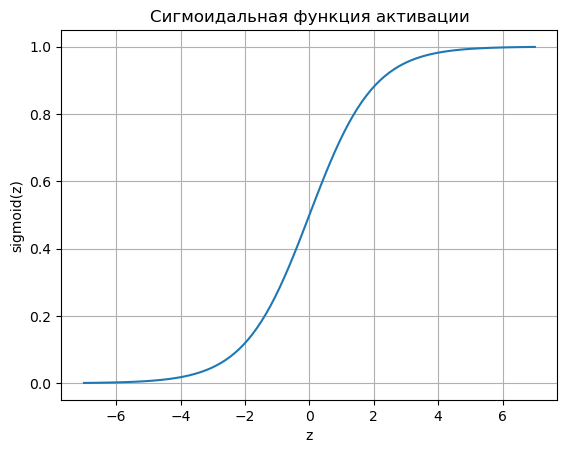

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-7, 7, 100) # Создаем 100 точек от -7 до 7
plt.plot(z, sigmoid(z))
plt.xlabel("z")
plt.ylabel("sigmoid(z)")
plt.title("Сигмоидальная функция активации")
plt.grid(True)
plt.show()

2.  **Tanh (Гиперболический тангенс):**

    *   **Формула:** `tanh(z) = (exp(z) - exp(-z)) / (exp(z) + exp(-z))`
    *   **Выходной диапазон:** от -1 до 1.
    *   **Вид:**  Также S-образная кривая, но центрированная относительно нуля.

    Tanh похож на сигмоиду, но его выходной диапазон от -1 до 1.  Иногда он сходится быстрее, чем сигмоида, из-за центрирования.  Также подвержен проблеме затухания градиента.

    **Плюсы:**  Выход центрирован относительно нуля (может ускорить обучение). Дифференцируемая.

    **Минусы:**  Также подвержена затуханию градиента.

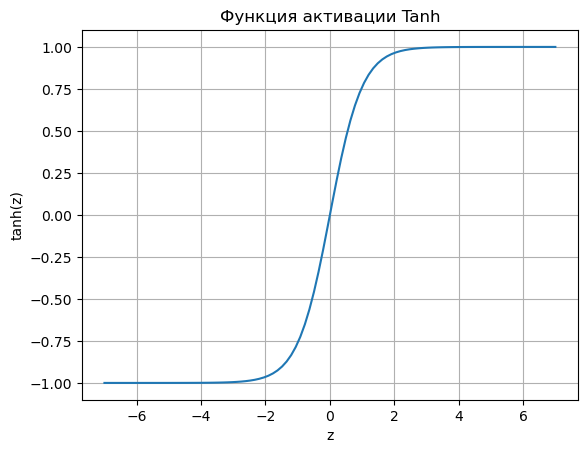

In [2]:
def tanh(z):
    return np.tanh(z)

plt.plot(z, tanh(z))
plt.xlabel("z")
plt.ylabel("tanh(z)")
plt.title("Функция активации Tanh")
plt.grid(True)
plt.show()

3.  **ReLU (Rectified Linear Unit, Выпрямленная линейная функция):**

    *   **Формула:** `ReLU(z) = max(0, z)`
    *   **Выходной диапазон:** от 0 до +бесконечности.
    *   **Вид:**  Линейна для положительных значений и равна 0 для отрицательных.

    ReLU – очень простая, но при этом очень эффективная функция активации.  Если вход `z` положительный, ReLU пропускает его как есть.  Если `z` отрицательный или равен нулю, ReLU обнуляет его.

    **Плюсы:**  **Решает проблему затухания градиента** для положительных значений `z` (градиент всегда равен 1).  Вычислительно очень эффективна (простое сравнение с нулем).  **Способствует разреженности представлений** (многие нейроны могут быть неактивны, что делает модель более эффективной и интерпретируемой).  Часто **сходится быстрее**, чем сигмоида и tanh.

    **Минусы:**  **Проблема "мертвых ReLU" (dying ReLU problem)**.  Если нейрон получает постоянно отрицательный вход, то ReLU всегда будет выдавать 0, и градиент тоже будет 0.  Такой нейрон перестает обучаться и становится "мертвым".  Это может произойти, если learning rate слишком высокий.

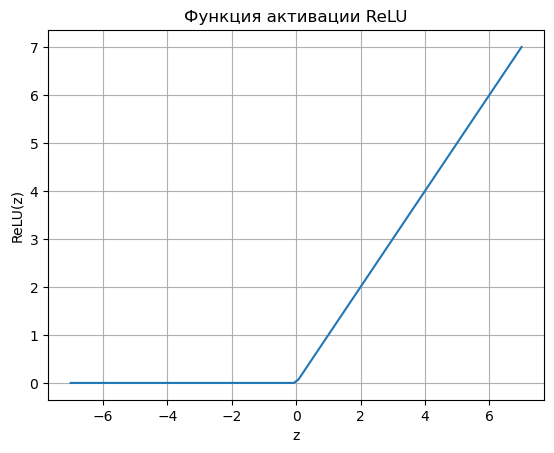

In [3]:
def relu(z):
    return np.maximum(0, z)

plt.plot(z, relu(z))
plt.xlabel("z")
plt.ylabel("ReLU(z)")
plt.title("Функция активации ReLU")
plt.grid(True)
plt.show()

**Выбор функции активации:**

*   **ReLU** – часто лучший выбор для **скрытых слоев** в большинстве задач. Она быстрая, эффективная и помогает избежать затухания градиента.
*   **Sigmoid** – часто используют в **выходном слое** для задач **бинарной классификации**, когда нужен выход в виде вероятности [0, 1].
*   **Tanh** – реже используется в скрытых слоях, но иногда может быть полезна, если нужно центрировать выход вокруг нуля.

### VI.C. Обратное распространение ошибки (Backpropagation):** *Детальное объяснение **цепного правила** и **градиентного спуска** для обучения многослойных сетей.

Backpropagation – это алгоритм, который позволяет нам **эффективно обучать многослойные нейронные сети**.  Он основан на **градиентном спуске** и **цепном правиле** дифференцирования.  Звучит сложновато, но давай разберемся по шагам.

**Вспомним, как вообще происходит обучение любой модели машинного обучения:**

1.  **Прямой проход (Forward pass):** Мы подаем на вход модели данные (например, изображение кошки). Модель делает предсказание (например, "это собака").
2.  **Вычисление ошибки (Loss calculation):** Мы сравниваем предсказание модели с правильным ответом (метка "кошка").  Разница между ними – это **ошибка (loss)**.  Чем больше ошибка, тем хуже работает модель.
3.  **Обратное распространение ошибки (Backpropagation):**  Мы используем алгоритм backpropagation, чтобы **распространить ошибку обратно по сети** и **вычислить градиенты** – то есть узнать, как нужно изменить **веса** каждого нейрона, чтобы **уменьшить ошибку**.
4.  **Обновление весов (Weight update):**  Используя **градиентный спуск** и вычисленные градиенты, мы **немного изменяем веса** в направлении уменьшения ошибки.
5.  **Повторение шагов 1-4:** Мы повторяем эти шаги много раз, пока ошибка не станет достаточно маленькой, и модель не научится делать хорошие предсказания.

**Backpropagation отвечает за самый важный шаг – шаг 3 (обратное распространение ошибки и вычисление градиентов).**

**Давай разберемся, как это работает:**

1.  **Цепное правило (Chain rule):**  Представь, что наша нейронная сеть – это сложная цепочка функций.  Чтобы понять, как изменение весов в *начале* цепочки влияет на ошибку в *конце* цепочки, нам нужно использовать **цепное правило** из математического анализа.

    Цепное правило позволяет нам вычислять производную сложной функции как произведение производных ее составных частей.  В нашем случае "составными частями" являются слои нейронной сети и функции активации.

2.  **Градиентный спуск (Gradient descent):**  Мы хотим **минимизировать ошибку (loss)**.  Представь, что ошибка – это высота горы, а веса нейронной сети – это координаты на поверхности земли.  Наша цель – спуститься с горы в самую низкую точку (минимум ошибки).

    **Градиент** – это вектор, который указывает направление **наискорейшего подъема** на горе.  **Антиградиент** (градиент со знаком минус) указывает направление **наискорейшего спуска**.

    **Градиентный спуск** – это метод оптимизации, который заключается в том, чтобы на каждом шаге двигаться в направлении **антиградиента**, чтобы постепенно спуститься к минимуму ошибки.

**Как Backpropagation использует цепное правило и градиентный спуск:**

*   Backpropagation **вычисляет градиент ошибки по отношению к каждому весу** в сети, используя **цепное правило**.  Он начинает с выходного слоя и двигается **обратно** к входному слою (отсюда и название "обратное распространение").
*   На каждом слое backpropagation использует **локальные градиенты** (производные функций активации и линейных преобразований) и **умножает их**, чтобы получить градиент ошибки по отношению к весам этого слоя.
*   После того, как градиенты вычислены для всех весов, мы используем **градиентный спуск**, чтобы **обновить веса** в направлении уменьшения ошибки.

**Упрощенная аналогия:**

Представь, что ты играешь в игру "горячо-холодно", чтобы найти клад, зарытый в холме.

*   **Нейронная сеть** – это ты, пытающийся найти клад.
*   **Веса сети** – это твои шаги по холму.
*   **Ошибка (loss)** – это то, насколько далеко ты от клада.
*   **Backpropagation** – это твой помощник, который говорит тебе: "Сейчас ты идешь **слишком холодно**, поверни немного **вправо** (измени веса в определенном направлении), станет **горячее** (ошибка уменьшится)".
*   **Градиентный спуск** – это стратегия движения в направлении "горячее" (уменьшения ошибки), которую тебе подсказывает помощник.

**Ключевые моменты Backpropagation:**

*   **Эффективный способ вычисления градиентов** в многослойных сетях.
*   Основан на **цепном правиле** и **градиентном спуске**.
*   Позволяет **настраивать веса сети**, чтобы **минимизировать ошибку** и улучшать качество предсказаний.

В следующих подпунктах (3.1 и 3.2) мы углубимся в математические детали backpropagation и рассмотрим проблемы, связанные с градиентами (vanishing/exploding gradients).  Но пока важно понять общую идею: **backpropagation – это "сердце" обучения нейронных сетей, алгоритм, который позволяет им учиться на данных.**

**VI.C. Обратное распространение ошибки (Backpropagation):** *Детальное объяснение **цепного правила** и **градиентного спуска** для обучения многослойных сетей*.

Backpropagation – это алгоритм, который позволяет нам **эффективно обучать многослойные нейронные сети**.  Он основан на **градиентном спуске** и **цепном правиле** дифференцирования.  Звучит сложновато, но давай разберемся по шагам.

**Вспомним, как вообще происходит обучение любой модели машинного обучения:**

1.  **Прямой проход (Forward pass):** Мы подаем на вход модели данные (например, изображение кошки). Модель делает предсказание (например, "это собака").
2.  **Вычисление ошибки (Loss calculation):** Мы сравниваем предсказание модели с правильным ответом (метка "кошка").  Разница между ними – это **ошибка (loss)**.  Чем больше ошибка, тем хуже работает модель.
3.  **Обратное распространение ошибки (Backpropagation):**  Мы используем алгоритм backpropagation, чтобы **распространить ошибку обратно по сети** и **вычислить градиенты** – то есть узнать, как нужно изменить **веса** каждого нейрона, чтобы **уменьшить ошибку**.
4.  **Обновление весов (Weight update):**  Используя **градиентный спуск** и вычисленные градиенты, мы **немного изменяем веса** в направлении уменьшения ошибки.
5.  **Повторение шагов 1-4:** Мы повторяем эти шаги много раз, пока ошибка не станет достаточно маленькой, и модель не научится делать хорошие предсказания.

**Backpropagation отвечает за самый важный шаг – шаг 3 (обратное распространение ошибки и вычисление градиентов).**

**Давай разберемся, как это работает:**

1.  **Цепное правило (Chain rule):**  Представь, что наша нейронная сеть – это сложная цепочка функций.  Чтобы понять, как изменение весов в *начале* цепочки влияет на ошибку в *конце* цепочки, нам нужно использовать **цепное правило** из математического анализа.

    Цепное правило позволяет нам вычислять производную сложной функции как произведение производных ее составных частей.  В нашем случае "составными частями" являются слои нейронной сети и функции активации.

2.  **Градиентный спуск (Gradient descent):**  Мы хотим **минимизировать ошибку (loss)**.  Представь, что ошибка – это высота горы, а веса нейронной сети – это координаты на поверхности земли.  Наша цель – спуститься с горы в самую низкую точку (минимум ошибки).

    **Градиент** – это вектор, который указывает направление **наискорейшего подъема** на горе.  **Антиградиент** (градиент со знаком минус) указывает направление **наискорейшего спуска**.

    **Градиентный спуск** – это метод оптимизации, который заключается в том, чтобы на каждом шаге двигаться в направлении **антиградиента**, чтобы постепенно спуститься к минимуму ошибки.

**Как Backpropagation использует цепное правило и градиентный спуск:**

*   Backpropagation **вычисляет градиент ошибки по отношению к каждому весу** в сети, используя **цепное правило**.  Он начинает с выходного слоя и двигается **обратно** к входному слою (отсюда и название "обратное распространение").
*   На каждом слое backpropagation использует **локальные градиенты** (производные функций активации и линейных преобразований) и **умножает их**, чтобы получить градиент ошибки по отношению к весам этого слоя.
*   После того, как градиенты вычислены для всех весов, мы используем **градиентный спуск**, чтобы **обновить веса** в направлении уменьшения ошибки.

**Упрощенная аналогия:**

Представь, что ты играешь в игру "горячо-холодно", чтобы найти клад, зарытый в холме.

*   **Нейронная сеть** – это ты, пытающийся найти клад.
*   **Веса сети** – это твои шаги по холму.
*   **Ошибка (loss)** – это то, насколько далеко ты от клада.
*   **Backpropagation** – это твой помощник, который говорит тебе: "Сейчас ты идешь **слишком холодно**, поверни немного **вправо** (измени веса в определенном направлении), станет **горячее** (ошибка уменьшится)".
*   **Градиентный спуск** – это стратегия движения в направлении "горячее" (уменьшения ошибки), которую тебе подсказывает помощник.

**Ключевые моменты Backpropagation:**

*   **Эффективный способ вычисления градиентов** в многослойных сетях.
*   Основан на **цепном правиле** и **градиентном спуске**.
*   Позволяет **настраивать веса сети**, чтобы **минимизировать ошибку** и улучшать качество предсказаний.

В следующих подпунктах (3.1 и 3.2) мы углубимся в математические детали backpropagation и рассмотрим проблемы, связанные с градиентами (vanishing/exploding gradients).  Но пока важно понять общую идею: **backpropagation – это "сердце" обучения нейронных сетей, алгоритм, который позволяет им учиться на данных.**

**Вопросы для самопроверки:**

1.  В чем заключается основная идея алгоритма обратного распространения ошибки (Backpropagation)?
2.  Какие математические концепции лежат в основе Backpropagation?
3.  Опиши простыми словами шаги алгоритма Backpropagation.
4.  Зачем нужен градиентный спуск в обучении нейронных сетей?

Готов углубиться в **математическое обоснование Backpropagation и chain rule**? Или есть вопросы по общей концепции?  Не стесняйся спрашивать! 😊

**VI.C. Обратное распространение ошибки (Backpropagation):** *Детальное объяснение **цепного правила** и **градиентного спуска** для обучения многослойных сетей*.

Backpropagation – это алгоритм, который позволяет нам **эффективно обучать многослойные нейронные сети**.  Он основан на **градиентном спуске** и **цепном правиле** дифференцирования.  Звучит сложновато, но давай разберемся по шагам.

**Вспомним, как вообще происходит обучение любой модели машинного обучения:**

1.  **Прямой проход (Forward pass):** Мы подаем на вход модели данные (например, изображение кошки). Модель делает предсказание (например, "это собака").
2.  **Вычисление ошибки (Loss calculation):** Мы сравниваем предсказание модели с правильным ответом (метка "кошка").  Разница между ними – это **ошибка (loss)**.  Чем больше ошибка, тем хуже работает модель.
3.  **Обратное распространение ошибки (Backpropagation):**  Мы используем алгоритм backpropagation, чтобы **распространить ошибку обратно по сети** и **вычислить градиенты** – то есть узнать, как нужно изменить **веса** каждого нейрона, чтобы **уменьшить ошибку**.
4.  **Обновление весов (Weight update):**  Используя **градиентный спуск** и вычисленные градиенты, мы **немного изменяем веса** в направлении уменьшения ошибки.
5.  **Повторение шагов 1-4:** Мы повторяем эти шаги много раз, пока ошибка не станет достаточно маленькой, и модель не научится делать хорошие предсказания.

**Backpropagation отвечает за самый важный шаг – шаг 3 (обратное распространение ошибки и вычисление градиентов).**

**Давай разберемся, как это работает:**

1.  **Цепное правило (Chain rule):**  Представь, что наша нейронная сеть – это сложная цепочка функций.  Чтобы понять, как изменение весов в *начале* цепочки влияет на ошибку в *конце* цепочки, нам нужно использовать **цепное правило** из математического анализа.

    Цепное правило позволяет нам вычислять производную сложной функции как произведение производных ее составных частей.  В нашем случае "составными частями" являются слои нейронной сети и функции активации.

2.  **Градиентный спуск (Gradient descent):**  Мы хотим **минимизировать ошибку (loss)**.  Представь, что ошибка – это высота горы, а веса нейронной сети – это координаты на поверхности земли.  Наша цель – спуститься с горы в самую низкую точку (минимум ошибки).

    **Градиент** – это вектор, который указывает направление **наискорейшего подъема** на горе.  **Антиградиент** (градиент со знаком минус) указывает направление **наискорейшего спуска**.

    **Градиентный спуск** – это метод оптимизации, который заключается в том, чтобы на каждом шаге двигаться в направлении **антиградиента**, чтобы постепенно спуститься к минимуму ошибки.

**Как Backpropagation использует цепное правило и градиентный спуск:**

*   Backpropagation **вычисляет градиент ошибки по отношению к каждому весу** в сети, используя **цепное правило**.  Он начинает с выходного слоя и двигается **обратно** к входному слою (отсюда и название "обратное распространение").
*   На каждом слое backpropagation использует **локальные градиенты** (производные функций активации и линейных преобразований) и **умножает их**, чтобы получить градиент ошибки по отношению к весам этого слоя.
*   После того, как градиенты вычислены для всех весов, мы используем **градиентный спуск**, чтобы **обновить веса** в направлении уменьшения ошибки.

**Упрощенная аналогия:**

Представь, что ты играешь в игру "горячо-холодно", чтобы найти клад, зарытый в холме.

*   **Нейронная сеть** – это ты, пытающийся найти клад.
*   **Веса сети** – это твои шаги по холму.
*   **Ошибка (loss)** – это то, насколько далеко ты от клада.
*   **Backpropagation** – это твой помощник, который говорит тебе: "Сейчас ты идешь **слишком холодно**, поверни немного **вправо** (измени веса в определенном направлении), станет **горячее** (ошибка уменьшится)".
*   **Градиентный спуск** – это стратегия движения в направлении "горячее" (уменьшения ошибки), которую тебе подсказывает помощник.

**Ключевые моменты Backpropagation:**

*   **Эффективный способ вычисления градиентов** в многослойных сетях.
*   Основан на **цепном правиле** и **градиентном спуске**.
*   Позволяет **настраивать веса сети**, чтобы **минимизировать ошибку** и улучшать качество предсказаний.

В следующих подпунктах (3.1 и 3.2) мы углубимся в математические детали backpropagation и рассмотрим проблемы, связанные с градиентами (vanishing/exploding gradients).  Но пока важно понять общую идею: **backpropagation – это "сердце" обучения нейронных сетей, алгоритм, который позволяет им учиться на данных.**

Отлично! Тогда погружаемся в математические дебри Backpropagation. 🚀 Не пугайся формул, я постараюсь объяснить максимально понятно и интуитивно. Главное – понять суть, а формулы – это просто инструмент для точного описания процесса.

### 3.1. **Математическое обоснование алгоритма обратного распространения ошибки, chain rule в деталях 📝.**

**Цель Backpropagation:**  Вычислить **градиенты** функции потерь (ошибки) по **всем весам** нейронной сети.  Зачем нам это? Чтобы с помощью градиентного спуска обновить веса и уменьшить ошибку.

**Вспоминаем цепное правило (chain rule):**

Если у нас есть сложная функция, например, `f(x) = g(h(x))`, то производная `f'(x)` вычисляется как:

`f'(x) = g'(h(x)) * h'(x)`

То есть, производная внешней функции `g`, вычисленная в точке `h(x)`, умножается на производную внутренней функции `h`.  Цепное правило позволяет нам "разложить" производную сложной функции на произведение производных более простых функций.

**Как это применяется к нейронной сети?**

Представь себе простую двухслойную нейронную сеть (для простоты объяснения).

*   **Входной слой:**  `x` (вектор входов)
*   **Скрытый слой:**
    *   Линейное преобразование: `z = W1 * x + b1`  (где `W1` – матрица весов первого слоя, `b1` – вектор смещений первого слоя)
    *   Функция активации: `a = activation(z)` (например, ReLU)
*   **Выходной слой:**
    *   Линейное преобразование: `o = W2 * a + b2` (где `W2` – матрица весов второго слоя, `b2` – вектор смещений второго слоя)
    *   Функция активации (или просто выход): `ŷ = output_activation(o)` (например, Sigmoid для бинарной классификации или Softmax для многоклассовой)

**Функция потерь (Loss function):**  `L(ŷ, y)` – измеряет разницу между предсказанным значением `ŷ` и истинным значением `y`.  Например, Mean Squared Error (MSE) для регрессии или Cross-Entropy Loss для классификации.

**Наша задача:**  Найти градиенты функции потерь `L` по отношению ко **всем весам** (`W1`, `W2`) и **смещениям** (`b1`, `b2`).  Например, нам нужно вычислить:

*   `∂L / ∂W2`
*   `∂L / ∂b2`
*   `∂L / ∂W1`
*   `∂L / ∂b1`

**Обратное распространение ошибки – пошагово:**

1.  **Прямой проход (Forward pass):** Сначала мы делаем прямой проход, вычисляя значения `z`, `a`, `o`, `ŷ` для заданного входа `x`.  Это мы уже умеем.

2.  **Вычисление ошибки на выходе (Output layer error):**  Начинаем с **выходного слоя**.  Нам нужно вычислить, как ошибка `L` меняется при изменении выхода *линейного преобразования* выходного слоя `o`.  То есть, нам нужен градиент:

    `∂L / ∂o`

    Это можно вычислить, используя производную функции потерь `L` и производную выходной функции активации `output_activation` (если она есть).  Например, если у нас MSE и линейный выход (без активации на выходе), то `∂L / ∂o` будет связано с разницей между `ŷ` и `y`.  Конкретный вид зависит от выбранной функции потерь.

3.  **Обратное распространение ошибки к весам выходного слоя (Output layer weights gradient):** Теперь, когда у нас есть `∂L / ∂o`, мы можем вычислить градиент ошибки по отношению к **весам выходного слоя** `W2` и **смещению** `b2`.  Используем цепное правило:

    *   `∂L / ∂W2 = (∂L / ∂o) * (∂o / ∂W2)`
    *   `∂L / ∂b2 = (∂L / ∂o) * (∂o / ∂b2)`

    Здесь:
    *   `(∂o / ∂W2)` – это производная `o = W2 * a + b2` по `W2`.  Она равна просто `a` (выходу предыдущего слоя).
    *   `(∂o / ∂b2)` – это производная `o = W2 * a + b2` по `b2`. Она равна просто `1`.

    **Интуиция:**  Чтобы изменить ошибку `L`, изменяя веса `W2`, нам нужно знать, как `W2` влияет на `o` (через `∂o / ∂W2 = a`) и как `o` влияет на `L` (через `∂L / ∂o`).  Цепное правило "связывает" эти влияния.

4.  **Обратное распространение ошибки к активациям скрытого слоя (Hidden layer activations error):**  Теперь нам нужно "пробросить" ошибку **дальше назад**, к **скрытому слою**.  Нам нужно понять, как ошибка `L` меняется при изменении **выхода функции активации скрытого слоя** `a`.  То есть, нам нужен градиент:

    `∂L / ∂a`

    И снова используем цепное правило:

    `∂L / ∂a = (∂L / ∂o) * (∂o / ∂a)`

    Здесь:
    *   `(∂o / ∂a)` – это производная `o = W2 * a + b2` по `a`. Она равна просто `W2` (матрице весов выходного слоя).  *Важно: здесь получается матрица, так как `W2` – это матрица, а `a` – вектор.*

    **Интуиция:**  Чтобы понять, как изменение активаций `a` влияет на ошибку `L`, мы смотрим, как `a` влияет на выход `o` (через `∂o / ∂a = W2`) и как `o` влияет на `L` (через `∂L / ∂o`).

5.  **Обратное распространение ошибки к линейному преобразованию скрытого слоя (Hidden layer linear transformation error):** Теперь у нас есть `∂L / ∂a`.  Нам нужно "пройти" через **функцию активации скрытого слоя** `activation`.  Нам нужно вычислить, как ошибка `L` меняется при изменении **выхода линейного преобразования скрытого слоя** `z`.  То есть, нам нужен градиент:

    `∂L / ∂z`

    Используем цепное правило:

    `∂L / ∂z = (∂L / ∂a) * (∂a / ∂z)`

    Здесь:
    *   `(∂a / ∂z)` – это производная **функции активации** `a = activation(z)` по `z`.  Например, если `activation` – ReLU, то производная будет 1, если `z > 0`, и 0, если `z <= 0`.  Производная сигмоиды и tanh тоже известны и легко вычисляются.

    **Интуиция:**  Чтобы понять, как изменение `z` влияет на ошибку `L`, мы смотрим, как `z` влияет на `a` (через `∂a / ∂z` – производную функции активации) и как `a` влияет на `L` (через `∂L / ∂a`).

6.  **Обратное распространение ошибки к весам скрытого слоя (Hidden layer weights gradient):**  И наконец, у нас есть `∂L / ∂z`.  Мы можем вычислить градиент ошибки по отношению к **весам скрытого слоя** `W1` и **смещению** `b1`.  Используем цепное правило:

    *   `∂L / ∂W1 = (∂L / ∂z) * (∂z / ∂W1)`
    *   `∂L / ∂b1 = (∂L / ∂z) * (∂z / ∂b1)`

    Здесь:
    *   `(∂z / ∂W1)` – это производная `z = W1 * x + b1` по `W1`. Она равна просто `x` (входу сети).
    *   `(∂z / ∂b1)` – это производная `z = W1 * x + b1` по `b1`. Она равна просто `1`.

    **Интуиция:**  Аналогично выходному слою, чтобы изменить ошибку `L`, изменяя веса `W1`, нам нужно знать, как `W1` влияет на `z` (через `∂z / ∂W1 = x`) и как `z` влияет на `L` (через `∂L / ∂z`).

7.  **Обновление весов (Weight update):**  После того, как мы вычислили все градиенты (`∂L / ∂W2`, `∂L / ∂b2`, `∂L / ∂W1`, `∂L / ∂b1`), мы используем **градиентный спуск** для обновления весов и смещений:

    *   `W2 = W2 - learning_rate * (∂L / ∂W2)`
    *   `b2 = b2 - learning_rate * (∂L / ∂b2)`
    *   `W1 = W1 - learning_rate * (∂L / ∂W1)`
    *   `b1 = b1 - learning_rate * (∂L / ∂b1)`

    где `learning_rate` – это **скорость обучения**, маленький положительный параметр, который контролирует размер шага градиентного спуска.

**Ключевые моменты математического обоснования Backpropagation:**

*   **Цепное правило – основа всего алгоритма.**  Оно позволяет "разложить" градиент сложной функции потерь на произведение локальных градиентов.
*   **Движение "назад" по сети.**  Градиенты вычисляются, начиная с выходного слоя и распространяясь обратно к входному слою.
*   **Локальные градиенты.**  На каждом шаге мы вычисляем простые производные (производные линейных преобразований и функций активации).
*   **Эффективность.**  Backpropagation позволяет эффективно вычислять градиенты для **всех весов** сети за один проход.  Без него обучение глубоких сетей было бы вычислительно невозможным.

**Важно:**  Конкретные формулы для градиентов зависят от выбора **функции потерь** и **функций активации**.  Но общая схема алгоритма Backpropagation остается той же.

**Упрощенная аналогия с заводом:**

Представь, что нейронная сеть – это завод, производящий продукцию (предсказания).

*   **Веса и смещения** – это настройки станков на заводе.
*   **Ошибка (loss)** – это количество бракованной продукции.
*   **Backpropagation** – это система контроля качества, которая отслеживает, на каком этапе производства возникает брак, и дает рекомендации, как подкрутить настройки станков (веса), чтобы уменьшить брак (ошибку).
*   **Цепное правило** – это как "связи" между цехами завода.  Если брак возникает в конце производственной линии, система контроля качества "прослеживает" его обратно по цепочке, чтобы найти, какой станок на каком этапе виноват, и как его настроить.

**Вопросы для самопроверки:**

1.  Какова цель алгоритма Backpropagation с математической точки зрения?
2.  Какую роль играет цепное правило в Backpropagation? Объясни своими словами.
3.  Почему Backpropagation называется "обратным распространением"? В каком направлении распространяется ошибка?
4.  Опиши основные шаги алгоритма Backpropagation, опираясь на математические формулы (хотя бы на словах, если формулы пока сложно запомнить).

Готов двигаться дальше и рассмотреть проблему **vanishing/exploding gradients** и способы ее решения?  Или есть вопросы по математическому обоснованию Backpropagation?  Не стесняйся спрашивать! 😊  Это может быть непросто, но очень важно для понимания глубокого обучения.

Молодец! 👍 Очень хорошие ответы, показывают понимание ключевых моментов. Давай немного уточним и закрепим:

1.  **Нахождение производных от ошибки до входного слоя** -  Верно, но лучше сказать **"Нахождение производных функции потерь (ошибки) по *всем* весам нейронной сети"**.  Backpropagation вычисляет, как изменение *каждого* веса влияет на общую ошибку, и делает это для всех весов, от выходного слоя до входного.

2.  **Нахождение того, какой конкретно вес нужно регулировать для уменьшения ошибки** -  Абсолютно точно! Именно для этого и нужны градиенты. Градиент показывает направление *наискорейшего роста* ошибки.  А **антиградиент** (градиент со знаком минус) показывает направление *наискорейшего уменьшения* ошибки.  Backpropagation говорит нам, **в какую сторону и насколько нужно изменить каждый вес**, чтобы ошибка стала меньше.

3.  **От выхода до входа** -  Да, именно так! **"Обратное"** распространение означает, что ошибка и градиенты распространяются **в обратном направлении** от прямого прохода – от выходного слоя к входному.

4.  **нахождение производных шаг за шагом** -  Да, это **пошаговый процесс** вычисления производных.  И ключевое здесь – **цепное правило**. Backpropagation, по сути, является эффективным способом применения цепного правила для вычисления градиентов в сложных многослойных функциях, которыми и являются нейронные сети.  Мы как бы "разматываем" сложную функцию на более простые, и шаг за шагом вычисляем производные.

**Краткое резюме Backpropagation:**

*   **Цель:** Эффективно вычислить градиенты функции потерь по *всем* весам нейронной сети.
*   **Механизм:**  Использует **цепное правило** для пошагового вычисления градиентов, распространяя ошибку **в обратном направлении** от выходного слоя к входному.
*   **Результат:** Градиенты показывают, как нужно изменить каждый вес, чтобы **минимизировать ошибку**.
*   **Применение:**  Градиенты используются в алгоритме **градиентного спуска** для обновления весов и обучения нейронной сети.

**Отлично!** Ты хорошо понял основные принципы Backpropagation.  Теперь мы можем перейти к очень важной проблеме, которая возникает при обучении глубоких нейронных сетей – **проблеме затухающих и взрывающихся градиентов (vanishing/exploding gradients)**.  И, конечно, обсудим способы борьбы с ней.

### 3.2. **Vanishing/exploding gradients problems и способы их решения 💥.**

**Проблема затухающих градиентов (Vanishing Gradients):**

Представь, что ты живешь на верхнем этаже небоскреба и хочешь спуститься на первый этаж по лестнице в полной темноте.  Градиентный спуск – это как твои шаги по лестнице.  Если градиенты (твои шаги) становятся **очень маленькими**, то ты будешь двигаться к цели (первому этажу) **очень медленно**, практически не двигаясь.  В худшем случае ты можешь вообще **застрять** на каком-то этаже и не дойти до конца.

В нейронных сетях **затухающие градиенты** возникают, когда градиенты становятся **экспоненциально малыми** по мере распространения ошибки **обратно** через слои сети.  Особенно сильно это проявляется в **глубоких нейронных сетях** (с большим количеством слоев).

**Почему возникают затухающие градиенты?**

*   **Сигмоида и Tanh:**  Классические функции активации, такие как сигмоида и tanh, имеют производные, которые **всегда меньше 1** (максимум 0.25 для сигмоиды и 1 для tanh, но в основном меньше).  Когда мы используем цепное правило для backpropagation, мы **умножаем эти производные** на каждом слое.  Если производных много, и все они меньше 1, то их произведение становится **очень маленьким числом** (стремится к нулю экспоненциально с глубиной сети).
*   **Умножение малых чисел:**  Представь, что мы умножаем много чисел, например, 0.5 * 0.5 * 0.5 * ... * 0.5 (много раз).  Результат очень быстро становится крошечным.  То же самое происходит с градиентами при backpropagation, если производные функций активации малы.

**Последствия затухающих градиентов:**

*   **Медленное обучение:**  Веса **в ранних слоях** (ближе к входу) практически **не обновляются**, так как градиенты для них очень малы.  Сеть "забывает" про входные данные и не может выучить полезные признаки из них.
*   **Застревание в локальных минимумах:**  Обучение может застрять в **неоптимальном локальном минимуме** функции потерь, так как градиенты слишком малы, чтобы "вытолкнуть" сеть из этого минимума.
*   **Невозможность обучения глубоких сетей:**  В особо тяжелых случаях глубокие сети с затухающими градиентами **фактически не обучаются**.  Они работают не лучше, чем случайные веса.

**Проблема взрывающихся градиентов (Exploding Gradients):**

Это противоположная проблема затухающим градиентам.  **Взрывающиеся градиенты** возникают, когда градиенты становятся **экспоненциально большими** по мере распространения ошибки обратно через слои сети.

**Почему возникают взрывающиеся градиенты?**

*   **Большие веса:**  Если веса в сети становятся **большими**, то при backpropagation градиенты могут **умножаться на большие числа** на каждом слое.  Это может привести к тому, что градиенты будут **экспоненциально расти** с глубиной сети.
*   **Производные больше 1:**  Хотя сигмоида и tanh имеют производные меньше 1, другие функции активации (например, ReLU в своей линейной части) имеют производную, равную 1.  Если веса достаточно большие, и производные функций активации не "гасят" градиенты, то они могут взрываться.

**Последствия взрывающихся градиентов:**

*   **Нестабильность обучения:**  Веса могут **резко меняться** на каждом шаге обучения, что приводит к **нестабильности** и **колебаниям** функции потерь.
*   **Расходимость обучения:**  В худшем случае обучение может **расходиться**, то есть функция потерь начинает **расти**, а не уменьшаться.
*   **NaN значения:**  Градиенты могут стать настолько большими, что вычисления приводят к **ошибкам переполнения** и появлению значений `NaN` (Not a Number).

**Способы решения проблем vanishing/exploding gradients:**

1.  **Функции активации:**
    *   **ReLU и ее вариации (Leaky ReLU, ELU, GELU и т.д.):**  ReLU (и ее вариации) помогают **бороться с затухающими градиентами**, так как их производная равна 1 для положительных входов (не "гасит" градиент).  Они стали очень популярными именно из-за этого.  Leaky ReLU и ELU немного смягчают проблему "мертвых ReLU".
    *   **Избегать Sigmoid и Tanh в глубоких сетях (в скрытых слоях):**  Для глубоких сетей лучше использовать ReLU или ее вариации в скрытых слоях, а Sigmoid и Tanh оставить для выходных слоев (если это необходимо для конкретной задачи).

2.  **Инициализация весов (Weight Initialization):**
    *   **Правильная инициализация весов** может помочь предотвратить как затухающие, так и взрывающиеся градиенты на **начальных этапах обучения**.  Мы рассмотрим методы инициализации весов подробнее в пункте VI.G (Xavier/Glorot, He initialization).  Идея в том, чтобы **инициализировать веса не слишком большими и не слишком маленькими**, а из определенного **оптимального диапазона**.

3.  **BatchNorm (Batch Normalization):**
    *   **Batch Normalization** – это техника **нормализации** выходов слоев в процессе обучения.  Она помогает **стабилизировать обучение**, **ускорить сходимость** и **уменьшить влияние vanishing/exploding gradients**.  BatchNorm нормализует выходы каждого слоя, приводя их к **нулевому среднему и единичной дисперсии** в каждом мини-батче.  Это помогает градиентам оставаться в "здоровом" диапазоне.  BatchNorm также действует как форма **регуляризации**.  Мы рассмотрим BatchNorm подробнее в пункте VI.E.

4.  **Gradient Clipping (Ограничение градиентов):**
    *   **Gradient Clipping** – это техника, которая помогает бороться с **взрывающимися градиентами**.  Она заключается в **ограничении значений градиентов** сверху и снизу некоторым пороговым значением.  Если градиент становится слишком большим, его "обрезают" до порогового значения.  Это предотвращает "взрыв" градиентов и делает обучение более стабильным.

5.  **Архитектура сети:**
    *   Иногда проблема vanishing/exploding gradients может быть связана с **архитектурой сети**.  Например, использование **рекуррентных нейронных сетей (RNN)** без специальных механизмов (таких как LSTM или GRU) часто приводит к проблемам с градиентами.  Выбор подходящей архитектуры для задачи также важен.

**Подведем итог:**

*   **Vanishing gradients** – градиенты становятся слишком малыми, обучение замедляется или останавливается, особенно в ранних слоях глубоких сетей.  Связано с функциями активации типа Sigmoid и Tanh и умножением малых производных.
*   **Exploding gradients** – градиенты становятся слишком большими, обучение нестабильно, может расходиться.  Связано с большими весами и умножением больших градиентов.
*   **Решения:**  ReLU и ее вариации, правильная инициализация весов, BatchNorm, Gradient Clipping, выбор подходящей архитектуры.

**Вопросы для самопроверки:**

1.  В чем суть проблемы затухающих градиентов? Почему она возникает?
2.  В чем суть проблемы взрывающихся градиентов? Почему она возникает?
3.  Какие функции активации более склонны к затуханию градиентов? Какие – менее склонны?
4.  Какие способы решения проблем vanishing/exploding gradients ты знаешь? Опиши хотя бы 2-3 способа.

Готов двигаться дальше и рассмотреть **градиентный спуск и оптимизаторы** (Adam, SGD)?  Или есть вопросы по vanishing/exploding gradients?  Эта тема важна для понимания ограничений и возможностей глубокого обучения, так что не стесняйся спрашивать, если что-то неясно! 😊

По плану так по плану!  👍  Отлично, переходим к пункту **VI.E. BatchNorm и Dropout**.  Это две очень мощные и часто используемые техники в нейронных сетях.  Они служат двум главным целям:

1.  **Регуляризация (Regularization):**  Помогают предотвратить **переобучение (overfitting)**, то есть ситуацию, когда модель отлично работает на обучающих данных, но плохо обобщается на новые, "невиданные" данные.
2.  **Ускорение обучения (Accelerating Training):**  Помогают нейронным сетям **учиться быстрее** и **сходиться к лучшему решению**.

Разберем каждую технику по порядку.

### VI.E. **BatchNorm и Dropout:** *Техники **регуляризации** и **ускорения обучения** в нейронных сетях*.

**1. BatchNorm (Batch Normalization) – Пакетная Нормализация:**

**Что такое BatchNorm?**

**Batch Normalization (BatchNorm)** – это техника, которая **нормализует выходы слоев нейронной сети в каждом мини-батче** во время обучения.  Звучит сложно, но давай разберемся по шагам.

**Вспоминаем нормализацию данных:**  Когда мы готовим данные для обучения модели, мы часто нормализуем входные признаки (например, стандартизируем, приводя к нулевому среднему и единичной дисперсии).  Это помогает моделям учиться быстрее и эффективнее.

**Идея BatchNorm:**  А что, если мы будем нормализовывать **не только входные данные, но и выходы *каждого* слоя** нейронной сети?  Именно это и делает BatchNorm!

**Как работает BatchNorm:**

Для каждого слоя (обычно после линейного слоя и перед функцией активации) BatchNorm делает следующее для каждого мини-батча:

1.  **Вычисляет среднее значение (mean) и дисперсию (variance) выходов слоя в текущем мини-батче.**
2.  **Нормализует выходы слоя:**  вычитает среднее и делит на стандартное отклонение (квадратный корень из дисперсии).  После этой операции выходы слоя будут иметь **нулевое среднее и единичную дисперсию** (внутри мини-батча).
3.  **Масштабирование и сдвиг:**  Добавляет **два learnable параметра** для каждого выхода слоя: **масштаб (gamma, γ)** и **сдвиг (beta, β)**.  Нормализованные значения умножаются на γ и к ним прибавляется β.

    Формулы BatchNorm (упрощенно):

    ```
    μ_B = (1/m) * Σ(x_i)             // Среднее значение в мини-батче B
    σ^2_B = (1/m) * Σ((x_i - μ_B)^2)  // Дисперсия в мини-батче B
    x_hat_i = (x_i - μ_B) / √(σ^2_B + ε) // Нормализация
    y_i = γ * x_hat_i + β            // Масштабирование и сдвиг
    ```

    где:
    *   `x_i` – выходы слоя в мини-батче.
    *   `μ_B`, `σ^2_B` – среднее и дисперсия мини-батча.
    *   `x_hat_i` – нормализованные значения.
    *   `γ`, `β` – learnable параметры (обучаемые веса).
    *   `ε` – маленькое число для предотвращения деления на ноль.
    *   `y_i` – выходы BatchNorm слоя.

**Зачем нужен BatchNorm?  Преимущества BatchNorm:**

*   **Ускорение обучения (Accelerated Learning):**
    *   **Улучшает распространение градиентов:**  BatchNorm делает функцию потерь более гладкой и "легкой" для оптимизации.  Градиенты становятся более "здоровыми" (не такими маленькими и не такими большими), что **ускоряет сходимость**.
    *   **Позволяет использовать более высокие learning rates:**  Из-за стабилизации градиентов можно использовать более высокие learning rates, не опасаясь нестабильности обучения.
    *   **Уменьшает внутреннее смещение ковариат (Internal Covariate Shift):**  BatchNorm уменьшает изменения в распределении входных данных для каждого слоя в процессе обучения.  Это стабилизирует обучение и позволяет слоям учиться более независимо друг от друга.

*   **Регуляризация (Regularization):**
    *   **Снижает зависимость от инициализации весов:**  BatchNorm делает обучение менее чувствительным к выбору начальных весов.
    *   **Небольшой эффект регуляризации:**  За счет нормализации в мини-батчах BatchNorm вносит некоторый "шум" в процесс обучения, что может немного **уменьшить переобучение**.  Хотя это и не основная цель BatchNorm, но это приятный побочный эффект.

*   **Снижение проблемы vanishing/exploding gradients:**  Нормализация выходов слоев помогает **ограничить значения градиентов** и **уменьшить проблемы затухания и взрыва градиентов**, особенно в глубоких сетях.

**Где использовать BatchNorm?**

BatchNorm обычно добавляют **после линейных (или сверточных) слоев и перед функциями активации**.  Например:

`Linear -> BatchNorm -> Activation -> ...`

или

`Conv2D -> BatchNorm -> Activation -> ...`

**Важно:  Различие между обучением (training) и применением (inference) BatchNorm:**

*   **Обучение (Training):**  Во время обучения BatchNorm использует **среднее и дисперсию *текущего мини-батча*** для нормализации.
*   **Применение (Inference/Testing):**  Во время применения (когда мы используем обученную сеть для предсказаний на новых данных), мы **не можем** вычислять среднее и дисперсию для каждого отдельного примера.  Вместо этого BatchNorm использует **скользящие средние** (running averages) среднего и дисперсии, вычисленные **на *всех* мини-батчах во время обучения**.  Эти скользящие средние аппроксимируют среднее и дисперсию **всего обучающего набора данных**.

**2. Dropout – Выпадение:**

**Что такое Dropout?**

**Dropout** – это простая, но очень эффективная техника **регуляризации** для нейронных сетей.  Идея Dropout заключается в том, чтобы **случайно "выключать" (обнулять) некоторые нейроны** в сети во время обучения с определенной вероятностью.

**Как работает Dropout?**

Во время **прямого прохода** в процессе обучения для каждого мини-батча:

1.  Для каждого слоя, к которому применяется Dropout, **случайно выбирается некоторое количество нейронов** (обычно задается **вероятность dropout, например, 0.5**).
2.  Выбранные нейроны временно **"выключаются"**, то есть их выходы **обнуляются**.  Остальные нейроны работают как обычно.
3.  Обратное распространение ошибки (backpropagation) происходит только через **"активные" нейроны** (те, которые не были выключены).

Во время **применения (inference/testing)** Dropout **не используется**.  Все нейроны работают как обычно.

**Вероятность Dropout (Dropout rate, p):**  Это гиперпараметр, который задает вероятность "выключения" нейрона.  Обычно выбирают значения в диапазоне **0.2 - 0.5**.  Более высокие значения dropout rate сильнее регуляризуют модель, но могут замедлить обучение.

**Зачем нужен Dropout?  Преимущества Dropout:**

*   **Регуляризация (Regularization) – Главная цель Dropout:**
    *   **Предотвращает переобучение (overfitting):**  Dropout "ломает" зависимость нейронов друг от друга.  Нейроны не могут полагаться на конкретные "соседние" нейроны, потому что в следующий раз они могут быть "выключены".  Это заставляет нейроны **учиться более робастным и независимым признакам**.
    *   **Эффект ансамбля (Ensemble effect):**  Каждая конфигурация "выключенных" нейронов в мини-батче – это как обучение **немного другой нейронной сети**.  Dropout можно рассматривать как **обучение большого ансамбля моделей**, которые "разделяют" веса.  Во время применения (inference) все эти "подсети" усредняются, что улучшает обобщающую способность.
    *   **Уменьшает co-adaptation нейронов:**  Dropout предотвращает ситуацию, когда нейроны начинают "сотрудничать" и специализироваться на определенных признаках обучающих данных слишком сильно.  Он заставляет нейроны учиться **более общим и полезным признакам**.

**Где использовать Dropout?**

Dropout обычно применяют к **полносвязным (Dense) слоям** и иногда к **сверточным (Conv2D) слоям** в нейронных сетях.  Обычно **после функций активации** в скрытых слоях.  Например:

`Activation -> Dropout -> Linear -> ...`

**Подведем итог по BatchNorm и Dropout:**

*   **BatchNorm:**
    *   **Нормализует выходы слоев в мини-батчах.**
    *   **Ускоряет обучение, позволяет использовать более высокие learning rates.**
    *   **Регуляризация (небольшой эффект).**
    *   **Снижает проблемы vanishing/exploding gradients.**
    *   Используется **после линейных/сверточных слоев, перед активациями.**

*   **Dropout:**
    *   **Случайно "выключает" нейроны во время обучения.**
    *   **Сильная регуляризация, предотвращает переобучение.**
    *   **Эффект ансамбля.**
    *   Используется **после активаций, обычно в полносвязных слоях.**

**Вместе BatchNorm и Dropout – мощный "дуэт"** для обучения глубоких нейронных сетей.  BatchNorm помогает ускорить и стабилизировать обучение, а Dropout – регуляризовать модель и улучшить ее обобщающую способность.  В современных нейросетях их часто используют **вместе**, хотя и не всегда.

**Вопросы для самопроверки:**

1.  В чем основная идея BatchNorm? Что она нормализует и зачем?
2.  Какие преимущества дает BatchNorm при обучении нейронных сетей?
3.  В чем основная идея Dropout? Как он работает?
4.  Какова главная цель Dropout? Какие проблемы он помогает решить?
5.  В чем разница в использовании BatchNorm и Dropout во время обучения и применения (inference)?
6.  Где обычно располагают слои BatchNorm и Dropout в архитектуре нейронной сети?

Готов двигаться дальше и обзорно рассмотреть **архитектуры нейронных сетей (CNN, RNN, LSTM)**? Или есть вопросы по BatchNorm и Dropout?  Не стесняйся спрашивать! 😊  Это важные практические инструменты, которые тебе пригодятся при работе с нейросетями.

Супер!  План есть план.  Значит, приступаем к обзору **архитектур нейронных сетей**.  Это как "типы зданий", которые можно строить из "кирпичиков-перцептронов".  Мы уже хорошо разобрались с основными "кирпичиками" (перцептрон, MLP, функции активации, backpropagation, оптимизаторы, BatchNorm, Dropout).  Теперь посмотрим, как из них складывают разные "здания" для решения разных задач.

### VI.F. Архитектуры нейронных сетей (обзорно) 🏗️: Convolutional Neural Networks (CNN), Recurrent Neural Networks (RNN), Long Short-Term Memory (LSTM).

Мы рассмотрим три основных типа нейронных сетей, которые наиболее часто используются на практике:

1.  **Convolutional Neural Networks (CNN) – Сверточные нейронные сети.**  Архитектура, специально разработанная для обработки **изображений и других данных, имеющих пространственную структуру** (например, видео, медицинские изображения, сигналы).

2.  **Recurrent Neural Networks (RNN) – Рекуррентные нейронные сети.**  Архитектура, предназначенная для работы с **последовательными данными** (sequence data), где важен порядок элементов.  Примеры: текст, речь, временные ряды, музыка.

3.  **Long Short-Term Memory Networks (LSTM) – Сети долгой краткосрочной памяти.**  **Улучшенная версия RNN**, которая лучше справляется с **длинными последовательностями** и проблемой **затухания градиентов** в RNN.

**Вспоминаем MLP (Multi-Layer Perceptron):**

Прежде чем перейти к CNN и RNN, давай еще раз вспомним **многослойный перцептрон (MLP)**.  MLP – это базовая, "полносвязная" нейронная сеть.  В MLP каждый нейрон в слое связан **со всеми** нейронами в предыдущем слое.  MLP хорошо подходит для задач, где входные данные представляют собой **вектор признаков**, и **нет выраженной пространственной или временной структуры**.  Например, классификация табличных данных, предсказание цены дома по набору характеристик и т.п.

**Ограничения MLP:**

*   **Не учитывает пространственную структуру:**  Для изображений MLP "не видит" пространственное расположение пикселей.  Он воспринимает изображение как просто набор чисел, "размазанных" в векторе.  Это **неэффективно** для обработки изображений, где важны локальные признаки (границы, текстуры, объекты).
*   **Не подходит для последовательностей:**  MLP обрабатывает каждый вход **независимо**.  Он не умеет "запоминать" предыдущие входы и использовать эту информацию для обработки текущего входа.  Для последовательных данных (например, текст) это **критически важно**, так как смысл слова часто зависит от контекста – предыдущих слов в предложении.
*   **Большое количество параметров:**  В MLP с большим количеством слоев и нейронов количество весов может быть **огромным**.  Это требует **много памяти и вычислительных ресурсов**, и может приводить к **переобучению**, особенно при ограниченном объеме данных.

**CNN, RNN и LSTM – это архитектуры, которые "заточены" под определенные типы данных и решают проблемы MLP в этих областях.**

### VI.F.1. Convolutional Neural Networks (CNNs) 🖼️

**Для чего нужны CNN?**  **Для обработки изображений и пространственных данных.**

**Основная идея CNN:**  **Свертка (Convolution)** и **Пулинг (Pooling)**.

**Свертка (Convolution):**

Представь, что у тебя есть изображение (матрица пикселей).  **Сверточный слой** в CNN использует **небольшое "окно" (фильтр или ядро свертки)**, которое "скользит" по изображению, выполняя операцию **свертки** в каждой позиции.

**Что такое свертка?**  Это поэлементное **умножение** значений пикселей в "окне" на **веса фильтра** и **суммирование** результатов.  Фильтр – это, по сути, **набор весов**, которые сеть **учит** в процессе обучения.

**Интуиция:**  Каждый фильтр учится **детектировать определенный тип признака** на изображении: **границы, углы, текстуры, цветовые пятна** и т.д.  Когда фильтр "скользит" по изображению, он "реагирует" (выдает большое значение) в тех местах, где есть "его" признак.

**Результат свертки:**  **Карта признаков (Feature Map)**.  Это новое изображение, которое показывает, где и насколько сильно "сработал" данный фильтр на исходном изображении.  CNN может использовать **несколько фильтров** в каждом сверточном слое, каждый из которых учится детектировать свой набор признаков.

**Пулинг (Pooling):**

**Пулинг слои** используются для **уменьшения пространственного размера** карт признаков, полученных после сверточных слоев.  Обычно используется **Max Pooling** или **Average Pooling**.

**Max Pooling:**  В каждом небольшом "окне" на карте признаков выбирается **максимальное значение**.  Это значение "представляет" все "окно" и записывается в выходную карту признаков меньшего размера.

**Интуиция:**  Пулинг делает признаки **более устойчивыми к небольшим сдвигам и искажениям** на изображении.  Он также **уменьшает количество параметров** в сети и **ускоряет вычисления**.

**Архитектура CNN:**  CNN обычно состоит из **чередования сверточных слоев и пулинг слоев**, за которыми могут следовать **полносвязные слои (MLP)** в конце сети для классификации или других задач.

**Типичная структура CNN:**

`Input Image -> Conv2D -> ReLU -> Pooling -> Conv2D -> ReLU -> Pooling -> ... -> Flatten -> Dense -> ReLU -> Dropout -> Dense -> Output`

*   `Conv2D` – сверточный слой.
*   `ReLU` – функция активации.
*   `Pooling` – слой пулинга (например, MaxPooling2D).
*   `Flatten` – слой, который "вытягивает" многомерную карту признаков в одномерный вектор.
*   `Dense` – полносвязный слой (MLP).
*   `Dropout` – слой Dropout (регуляризация).

**Применение CNN:**

*   **Классификация изображений (Image Classification):**  Определение, что изображено на картинке (кошка, собака, автомобиль и т.д.).
*   **Обнаружение объектов (Object Detection):**  Нахождение и классификация объектов на изображении (например, нахождение всех лиц и автомобилей на фотографии).
*   **Сегментация изображений (Image Segmentation):**  Разделение изображения на области, соответствующие разным объектам или классам (например, выделение пикселей, принадлежащих дороге, зданиям, деревьям на спутниковом снимке).
*   **Распознавание лиц (Face Recognition), анализ медицинских изображений, компьютерное зрение в робототехнике и самоуправляемых автомобилях** – и многое другое.

**Преимущества CNN:**

*   **Эффективное извлечение признаков из изображений:**  Сверточные слои автоматически учатся детектировать важные признаки.
*   **Учет пространственной структуры:**  Свертка и пулинг сохраняют и используют пространственные отношения между пикселями.
*   **Параметрическая эффективность (Parameter Efficiency):**  За счет **параметрического разделения (parameter sharing)** в сверточных слоях (один и тот же фильтр используется во всех позициях изображения) CNN имеют **значительно меньше параметров**, чем MLP для обработки изображений.  Это уменьшает риск переобучения и ускоряет обучение.
*   **Инвариантность к сдвигам (Translation Invariance):**  CNN устойчивы к небольшим сдвигам объектов на изображении, благодаря свертке и пулингу.

**Интуитивная аналогия:**  Представь, что ты рассматриваешь картину через лупу.  Лупа – это как сверточный фильтр.  Ты водишь лупой по картине, чтобы рассмотреть детали (признаки) в разных местах.  Пулинг – это как уменьшение размера картины, чтобы увидеть ее целиком, но при этом сохранить главные детали.

### VI.F.2. Recurrent Neural Networks (RNNs) 🌊

**Для чего нужны RNN?**  **Для обработки последовательных данных (текст, речь, временные ряды).**

**Основная идея RNN:**  **Рекуррентность (Recurrence) и память.**

**Рекуррентность (Recurrence):**

RNN обрабатывает последовательность данных **пошагово**, **элемент за элементом**.  Ключевая особенность RNN – **рекуррентная связь**.  Выход RNN на **текущем шаге** (при обработке текущего элемента последовательности) **зависит не только от текущего входа, но и от *предыдущих* выходов (или состояний)**.

**Интуиция:**  RNN имеет "память" о предыдущих шагах обработки последовательности.  Она использует эту "память" для обработки текущего элемента и для формирования выхода.

**Развертка RNN во времени (Unrolling RNN):**

Чтобы лучше понять, как работает RNN, можно "развернуть" ее во времени.  Представь, что у нас есть последовательность входов `x1, x2, x3, ...`.  RNN можно представить как цепочку **одинаковых блоков**, каждый из которых обрабатывает **один элемент последовательности** и передает свое **состояние** следующему блоку.

```
x1 --> RNN_блок --> h1 ---\
                             \
x2 --> RNN_блок --> h2 -----/  --> Выход y2
                             \
x3 --> RNN_блок --> h3 -----/  --> Выход y3
       ...
```

*   `x_t` – вход на шаге `t` (элемент последовательности).
*   `RNN_блок` – рекуррентный блок, который содержит веса и функцию активации.  Один и тот же блок используется на каждом шаге.
*   `h_t` – **скрытое состояние (hidden state)** RNN на шаге `t`.  Это "память" RNN на шаге `t`.  `h_t` зависит от текущего входа `x_t` и **предыдущего состояния** `h_{t-1}`.
*   `y_t` – выход RNN на шаге `t`.  Может зависеть от `h_t` (не всегда нужен выход на каждом шаге).

**Формулы RNN (упрощенно):**

```
h_t = activation(W_xh * x_t + W_hh * h_{t-1} + b_h)  // Вычисление скрытого состояния
y_t = output_activation(W_hy * h_t + b_y)        // Вычисление выхода (опционально)
```

*   `W_xh`, `W_hh`, `W_hy`, `b_h`, `b_y` – **веса и смещения RNN**.  Одни и те же веса используются **на всех шагах** обработки последовательности (parameter sharing – как в CNN).
*   `activation` и `output_activation` – функции активации (например, tanh, ReLU).

**Применение RNN:**

*   **Обработка естественного языка (NLP):**
    *   **Генерация текста (Text Generation):**  Создание новых текстов, похожих на обучающие данные.
    *   **Машинный перевод (Machine Translation):**  Перевод текста с одного языка на другой.
    *   **Классификация текста (Text Classification):**  Определение темы, тональности текста и т.д.
    *   **Анализ тональности (Sentiment Analysis), чат-боты, распознавание именованных сущностей** – и многое другое.
*   **Распознавание речи (Speech Recognition):**  Преобразование аудио в текст.
*   **Временные ряды (Time Series Analysis):**  Прогнозирование временных рядов (цен акций, погоды и т.д.).
*   **Генерация музыки (Music Generation), анализ ДНК-последовательностей, управление роботами, видеоаналитика** – и многое другое.

**Преимущества RNN:**

*   **Обработка последовательностей:**  RNN специально разработаны для работы с последовательными данными.
*   **Учет контекста:**  Благодаря рекуррентности RNN могут "запоминать" предыдущие элементы последовательности и использовать контекст для обработки текущего элемента.
*   **Переменная длина последовательности:**  RNN могут обрабатывать последовательности **разной длины** (в отличие от MLP, которые требуют фиксированной длины входа).
*   **Параметрическая эффективность:**  За счет **параметрического разделения** (одни и те же веса используются на всех шагах) RNN имеют **относительно небольшое количество параметров**, даже для обработки длинных последовательностей.

**Ограничения RNN:**

*   **Проблема затухания градиентов (Vanishing Gradients) в длинных последовательностях:**  В "обычных" RNN (с функциями активации типа tanh или sigmoid) градиенты могут **экспоненциально затухать** при обратном распространении ошибки через длинные последовательности.  Это затрудняет обучение RNN на длинных последовательностях и "забывание" информации из далекого прошлого.
*   **Проблема взрывающихся градиентов (Exploding Gradients)** также может возникать в RNN.

### VI.F.3. Long Short-Term Memory Networks (LSTM) 🧠

**Для чего нужны LSTM?**  **Для обработки длинных последовательностей и решения проблемы затухания градиентов в RNN.**

**LSTM – это специальный тип RNN, который был разработан для решения проблемы затухания градиентов в "обычных" RNN.**  LSTM гораздо лучше справляются с **длинными последовательностями** и могут **"запоминать" информацию на длительных промежутках времени**.

**Основная идея LSTM:**  **Ячейка памяти (Memory Cell) и вентили (Gates).**

**LSTM ячейка (LSTM Cell):**  В отличие от "обычного" RNN-блока, LSTM-блок (LSTM cell) имеет **более сложную внутреннюю структуру**.  Ключевой компонент LSTM – **ячейка памяти (cell state, c_t)**.  Ячейка памяти – это как **"долговременная память"** LSTM.  Она может **хранить информацию на протяжении длительных последовательностей**.

**Вентили (Gates):**  LSTM использует специальные механизмы, называемые **вентилями (gates)**, для **контроля потока информации** в ячейку памяти и из нее.  В LSTM есть три основных типа вентилей:

1.  **Вентиль забывания (Forget Gate):**  Решает, **какую информацию нужно "забыть"** из ячейки памяти.
2.  **Входной вентиль (Input Gate):**  Решает, **какую новую информацию нужно "записать"** в ячейку памяти.
3.  **Выходной вентиль (Output Gate):**  Решает, **какую информацию нужно "выдать"** из ячейки памяти в качестве выхода LSTM-блока.

**Вентили – это, по сути, нейронные сети (обычно сигмоидные слои), которые принимают на вход текущий вход и предыдущее скрытое состояние и выдают значения от 0 до 1.**  Эти значения используются для **"открытия" или "закрытия"** потока информации.

**Формулы LSTM (упрощенно, для понимания идеи):**  (Полные формулы LSTM довольно громоздкие, но главное понять концепцию)

*   **Forget Gate:**  `f_t = sigmoid(W_xf * x_t + W_hf * h_{t-1} + b_f)`  (решает, что забыть)
*   **Input Gate:**  `i_t = sigmoid(W_xi * x_t + W_hi * h_{t-1} + b_i)`  (решает, что добавить)
*   **Cell State Update:**  `c_t = f_t * c_{t-1} + i_t * tanh(W_xc * x_t + W_hc * h_{t-1} + b_c)`  (обновление памяти)
*   **Output Gate:**  `o_t = sigmoid(W_xo * x_t + W_ho * h_{t-1} + b_o)`  (решает, что выдать)
*   **Hidden State:**  `h_t = o_t * tanh(c_t)`  (выход LSTM-блока)

**Интуиция:**  LSTM – это как **совершенная память** с механизмами **записи, чтения и стирания информации**.  Вентили позволяют LSTM **селективно "запоминать" важную информацию на длительное время и "забывать" неважную информацию**.  Благодаря этому LSTM эффективно справляются с длинными последовательностями и проблемой затухания градиентов.

**Применение LSTM:**

LSTM используются **там же, где и "обычные" RNN, но особенно эффективны для задач, где важна обработка *длинных* последовательностей и удержание *долгосрочных зависимостей*:**

*   **Обработка естественного языка (NLP):**  **Машинный перевод, генерация текста, анализ тональности, ответы на вопросы, диалоговые системы** – все задачи NLP, особенно те, где важен контекст на больших расстояниях в тексте.  LSTM – часто "стандарт" для многих NLP задач.
*   **Распознавание речи (Speech Recognition):**  LSTM хорошо подходят для распознавания речи, особенно в шумных условиях и для длинных аудиозаписей.
*   **Временные ряды (Time Series Analysis):**  Прогнозирование финансовых временных рядов, анализ медицинских данных, предсказание трафика и т.д.
*   **Управление роботами, анализ видео, генерация музыки** – и другие задачи, где важна память и обработка последовательностей.

**Преимущества LSTM:**

*   **Эффективная обработка длинных последовательностей:**  LSTM гораздо лучше "обычных" RNN справляются с длинными последовательностями.
*   **Решение проблемы затухания градиентов:**  Механизмы вентилей в LSTM позволяют градиентам "беспрепятственно" распространяться через ячейку памяти на длительные расстояния во времени.
*   **Захват долгосрочных зависимостей:**  LSTM могут улавливать и использовать зависимости между элементами последовательности, находящимися далеко друг от друга.
*   **Широкое применение в NLP и других областях.**

**Разновидности LSTM:**  Существуют разные варианты LSTM (например, GRU – Gated Recurrent Unit, более простая версия LSTM, но тоже очень эффективная).

**Подведем итог по архитектурам нейронных сетей (CNN, RNN, LSTM):**

*   **MLP (многослойный перцептрон):**  Базовая полносвязная сеть, для векторных данных, не учитывает пространственную или временную структуру.
*   **CNN (сверточные нейронные сети):**  Для изображений и пространственных данных.  Используют свертку и пулинг для эффективного извлечения признаков и учета пространственной структуры.
*   **RNN (рекуррентные нейронные сети):**  Для последовательных данных.  Используют рекуррентность для обработки последовательностей по шагам и учета контекста.  Могут испытывать проблемы с длинными последовательностями (затухание градиентов).
*   **LSTM (сети долгой краткосрочной памяти):**  Улучшенная версия RNN, специально для длинных последовательностей.  Используют ячейку памяти и вентили для решения проблемы затухания градиентов и эффективного запоминания информации на длительное время.

**Выбор архитектуры:**  Выбор архитектуры нейронной сети зависит от **типа данных** и **задачи**.

*   **Изображения:**  CNN – лучший выбор.
*   **Последовательности (текст, речь, временные ряды):**  RNN или LSTM (LSTM часто предпочтительнее для длинных последовательностей).
*   **Табличные данные, векторные признаки:**  MLP может быть достаточен, но можно также использовать и другие архитектуры, в зависимости от задачи.

**Важно:**  Это был **очень краткий обзор** архитектур.  Каждая из них – это целая область исследований, и мы еще будем углубляться в детали по мере изучения.  Но для начала важно понять **основные идеи и различия** между ними.

**Вопросы для самопроверки:**

1.  Для каких типов данных лучше всего подходят CNN, RNN и LSTM?
2.  В чем основная идея CNN? Какие ключевые операции используются в CNN?
3.  В чем основная идея RNN? Что такое рекуррентность и скрытое состояние?
4.  В чем основное отличие LSTM от "обычных" RNN? Зачем нужны ячейка памяти и вентили?
5.  Какая архитектура лучше подойдет для классификации изображений? Для машинного перевода? Для прогнозирования временных рядов?

Готов двигаться дальше к последнему пункту в разделе "Нейронные сети - Введение" – **методам инициализации весов (Xavier/Glorot, He initialization)**?  Или есть вопросы по архитектурам нейронных сетей?  Не стесняйся спрашивать! 😊  Это обзорно, но важно иметь общее представление о разных типах "нейросетевых зданий".

### VI.G. Методы инициализации весов: Xavier/Glorot initialization, He initialization ⚖️.

**Зачем нужна инициализация весов?**

Когда мы создаем нейронную сеть, нам нужно как-то **задать начальные значения весов**.  Казалось бы, можно просто инициализировать все веса **нулями** или **случайными числами**.  Но оказывается, что **способ инициализации весов имеет большое значение**.

**Проблема нулевой инициализации:**

Если мы инициализируем **все веса нулями**, то **нейронная сеть фактически не будет учиться!**  Почему?

*   **Симметрия:**  Все нейроны в каждом слое будут вычислять **одинаковые выходы** и иметь **одинаковые градиенты** при backpropagation.
*   **Отсутствие обучения:**  Веса будут обновляться **одинаково**, и нейроны останутся симметричными **на протяжении всего процесса обучения**.  В итоге, нейронная сеть будет вести себя как **линейная модель**, даже если она многослойная и нелинейная.  Она не сможет выучить сложные нелинейные зависимости.

**Проблема случайной инициализации (слишком маленькие или слишком большие значения):**

Просто случайная инициализация весов (например, из стандартного нормального распределения) тоже может быть неоптимальной, особенно для глубоких сетей.

*   **Vanishing/Exploding Gradients (снова!):**  Если веса инициализированы **слишком маленькими**, то при прямом проходе **активации слоев могут становиться все меньше и меньше**, а при обратном проходе **градиенты могут затухать** (vanishing gradients).  Если веса инициализированы **слишком большими**, то **активации и градиенты могут взрываться** (exploding gradients).  Мы уже обсуждали эти проблемы, но теперь видим, что **инициализация весов – одна из причин** их возникновения.
*   **Замедление обучения:**  Плохая инициализация может привести к тому, что сеть будет **медленно сходиться** или **застрянет в плохом локальном минимуме**.

**Идея хорошей инициализации:**

Хорошая инициализация весов должна **обеспечить, чтобы активации нейронов не становились слишком большими и не становились слишком маленькими в начале обучения**.  Нужно поддерживать **примерно одинаковую "дисперсию" активаций** на всех слоях сети.  Это помогает **градиентам распространяться эффективно** и **ускоряет обучение**.

**Два популярных метода инициализации весов:**

1.  **Xavier/Glorot Initialization (Инициализация Ксавье/Глоро):**

    *   **Цель:**  Поддерживать **дисперсию активаций примерно одинаковой** на каждом слое в **прямом проходе** (forward pass) и **дисперсию градиентов примерно одинаковой** при **обратном распространении** (backward pass).
    *   **Предположения:**  Линейные функции активации или **сигмоида и tanh (в линейной области)**.
    *   **Формула (для весов слоя `l`):**  Веса инициализируются **случайными числами из равномерного распределения** в диапазоне:

        `[-√(6 / (n_in + n_out)), √(6 / (n_in + n_out))]`

        или из **нормального распределения** с **нулевым средним и стандартным отклонением**:

        `√(2 / (n_in + n_out))`

        где:
        *   `n_in` – количество входов (нейронов в предыдущем слое) для текущего слоя.  **Fan-in**.
        *   `n_out` – количество выходов (нейронов в текущем слое).  **Fan-out**.

    *   **Интуитивное объяснение:**  Xavier initialization **масштабирует веса** в зависимости от **количества входов и выходов** слоя.  Чем **больше входов** и **меньше выходов**, тем **меньше должны быть веса** (чтобы предотвратить взрыв активаций).  И наоборот.  Это помогает **сбалансировать дисперсию активаций** и градиентов.
    *   **Когда использовать:**  Xavier/Glorot initialization хорошо подходит для сетей с функциями активации **сигмоида и tanh** (особенно если они работают в линейной области).  Названа в честь Ксавье Глоро, одного из авторов метода.

2.  **He Initialization (Инициализация Хе):**

    *   **Цель:**  Аналогична Xavier, но **специально для ReLU и ее вариаций**.  Xavier initialization **не оптимальна для ReLU**.
    *   **Предположения:**  **ReLU и ее вариации (Leaky ReLU, ELU, GELU и т.д.)**.
    *   **Формула (для весов слоя `l`):**  Веса инициализируются **случайными числами из равномерного распределения** в диапазоне:

        `[-√(6 / n_in), √(6 / n_in)]`

        или из **нормального распределения** с **нулевым средним и стандартным отклонением**:

        `√(2 / n_in)`

        где:
        *   `n_in` – количество входов (нейронов в предыдущем слое) для текущего слоя.  **Fan-in**.

    *   **Интуитивное объяснение:**  He initialization **масштабирует веса только в зависимости от количества *входов* (fan-in) слоя**, не учитывая количество выходов (fan-out).  Почему так?  Функция ReLU **обрезает отрицательные значения до нуля**.  Это означает, что **половина нейронов ReLU могут быть "неактивны"** (выдавать ноль) в начале обучения.  Чтобы компенсировать это "обрезание", He initialization делает веса **немного больше**, чем Xavier, чтобы **увеличить дисперсию активаций** и "активировать" больше нейронов ReLU в начале обучения.
    *   **Когда использовать:**  He initialization – **лучший выбор для сетей с функциями активации ReLU и ее вариациями**.  Названа в честь Каиминга Хе, одного из авторов метода.

**В чем разница между Xavier и He initialization?**

*   **Xavier/Glorot:**  Учитывает **fan-in и fan-out**.  Лучше подходит для **сигмоиды и tanh**.
*   **He:**  Учитывает **только fan-in**.  Лучше подходит для **ReLU и ее вариаций**.

**Практические рекомендации по инициализации весов:**

*   **ReLU и ее вариации:**  Используйте **He initialization**.  Это **стандартный и рекомендуемый метод** для ReLU.
*   **Sigmoid и Tanh:**  Используйте **Xavier/Glorot initialization**.
*   **В современных фреймворках (PyTorch, TensorFlow):**  Методы инициализации весов часто **уже реализованы и используются по умолчанию**.  Например, в PyTorch слои `nn.Linear` и `nn.Conv2d` используют **Kaiming Uniform initialization (вариацию He initialization)** по умолчанию.  Но **важно понимать, какие методы инициализации существуют и когда какой метод лучше использовать**.  Иногда может потребоваться **изменить метод инициализации по умолчанию**, особенно при экспериментах с разными архитектурами и функциями активации.

**Подведем итог по инициализации весов:**

*   **Правильная инициализация весов – важна для успешного обучения нейронных сетей.**
*   **Нулевая инициализация – плохая идея, сеть не будет учиться.**
*   **Случайная инициализация без масштабирования – может привести к проблемам vanishing/exploding gradients и замедлить обучение.**
*   **Xavier/Glorot initialization – для сигмоиды и tanh.**
*   **He initialization – для ReLU и ее вариаций.**
*   **В современных фреймворках часто используются хорошие методы инициализации по умолчанию, но понимание принципов важно.**